# Lobsters Logistic Redux
Let's return to the lobster problem, but this I'd like you to use logistic regression to find the solution.  First, the data:

In [2]:
len(data)

159

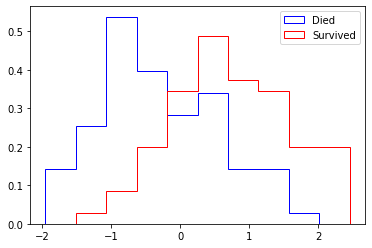

159


In [5]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('datasets/lobster_survive.dat',skiprows=1)
X,Y = data.T
X -= X.mean()
X /= X.std()

bins = np.unique(X)
plt.hist(X[Y==0],bins,histtype='step',density=True,label='Died',color='blue')
plt.hist(X[Y==1],bins,histtype='step',density=True,label='Survived',color='red')
plt.legend()
plt.show()
varX = np.var(X) #sigma^2 is the variance
print (len(X))

We would still like to know
$$
P(\text{Survive}=1|\text{Length}=x),
$$
where $\text{Survive}$ is a variable indicating whether the lobster survived or not, and $\text{Length}$ is the length of the lobster ($x\in\mathcal{R}$).  

In logistic regression, we will approach this directly by implementing logistic regression, where we model
$$
P(\text{Survive}=1|\text{Length}=x) = \sigma(\Phi \mathbf{w}).
$$
First implement the logistic function
$$
\sigma(z) = \frac{1}{1 + \mathrm{exp}(-z)}
$$

In [3]:
def sigmoid(z):
    sigma = 1/(1+np.exp(-z))
    return sigma

Next, define the log-posterior function
$$
\mathcal{L}(\mathbf{w};\mathbf{X}_{obs},\mathbf{Y}_{obs}) = \sum_{i=1}^m [Y_{obs,i} \ln \sigma(\Phi_i \mathbf{w}) + (1-Y_{obs,i}) \ln (1-\sigma(\Phi_i \mathbf{w}))] - \lambda \mathbf{w}^T \mathbf{w} 
$$

In [7]:
def L(w,X,Y,var_w):
    def phi(X):
        n = len(X)
        phi = np.ones((n,2))
        phi[:,1] = X
        return phi
    lamda = varX/var_w
    likelihood = -1*lamda*w.T@w
    for i in range(1, len(X)): 
        Phi = phi[X[i]]
        likelihood += Y[i] * np.log(sigmoid(z = Phi@w)) +(1 -Y[i])*np.log(1-sigmoid(z = Phi@w))
    return likelihood

We currently lack the tools necessary to minimize this function elegantly, but we can attack it using brute force.  Make the assumption that 
$$
y_i = w_0 + w_1 X_{obs,i}.
$$
Using either a grid-search approach (check out numpy.meshgrid) or a random sampling approach, search for the values of $\mathbf{w}$ that maximizes this likelihood function.  Plot all computed values of $\mathcal{L}(\mathbf{w})$ as a function of $\mathbf{w}$.  Useful commands for this plotting if you take the grid search approach might be plt.contourf.  For the random sampling approach, you might try plt.scatter (using the c= keyword argument).


In [ ]:
# Develop a method to find the best values of w_0 and w_1.  

w = np.random.normal(0, var_w, 2)
wStore = {}
for 


Using this best parameter set, plot lobster survival as a function of length.  

In [11]:
#! Plot lobster survival 

As a final bonus round, check out the matplotlib function plt.quiver, which is a useful command for plotting gradients (in 2D).  The gradient of the log-posterior function is 
$$
\nabla_\mathbf{w} \mathcal{L} = \sum_{i=1}^m \left[ (\mathbf{Y}_{obs,i} - \sigma(\Phi_i \mathbf{w})) \Phi_i\right] - \lambda\mathbf{w}^T. 
$$
Use the quiver command to produce a plot visualizing the gradient of the log-posterior.  Given this information, can you determine a more efficient way than brute force to find the maximum value of $\mathcal{L}(\mathbf{w}$?

In [12]:
#! use plt.quiver to visualize the gradients of the log-posterior.